In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 업로드
from google.colab import files
uploaded = files.upload()

Saving 202501.xlsx to 202501 (1).xlsx


In [19]:
# 데이터 불러오기
df = pd.read_excel('202501.xlsx')

In [20]:
# 시간 데이터 변환
df['Pump-Begin'] = pd.to_datetime(df['Pump-Begin'])
df['Pump-End'] = pd.to_datetime(df['Pump-End'])

# 시간 단위 인덱스 설정 (시작 시간 기준)
df.set_index('Pump-Begin', inplace=True)

In [27]:
# PM2.5 질량농도와 금속농도 데이터만 추출
pm25_col = 'Conc(ug/m3)'
metal_cols = [col for col in df.columns if '(ng/m3)' in col]

In [31]:
df_clean = df.copy()

# 숫자형 변환 및 나머지 Nah 변환
df_clean[pm25_col] = pd.to_numeric(df_clean[pm25_col], errors='coerce')
for metal in metal_cols:
    df_clean[metal] = pd.to_numeric(df_clean[metal], errors='coerce')

# 음수값 Nah 처리
df_clean[pm25_col] = df_clean[pm25_col].apply(lambda x: x if x >= 0 else None)
for metal in metal_cols:
    df_clean[metal] = df_clean[metal].apply(lambda x: x if x >= 0 else None)

# 극단값 처리 (평균 ± 3표준편차)
for col in [pm25_col] + metal_cols:
    mean_val = df_clean[col].mean()
    std_val = df_clean[col].std()
    df_clean[col] = df_clean[col].apply(lambda x: x if (mean_val - 3*std_val <= x <= mean_val + 3*std_val) else None)

df_clean.head()

,Pump-End,MassResetTime,Number-of-Split,Analysis-Id,Alarms,ElemError,Mass(ug),Conc(ug/m3),BP_Mass(ugC),BP_Conc(ugC/m3),...,Cd(ng/m3),In(ng/m3),Sn(ng/m3),Sb(ng/m3),Te(ng/m3),Cs(ng/m3),Ba(ng/m3),Ce(ng/m3),Pb(ng/m3),Bi(ng/m3)
Pump-Begin,,,,,,,,,,,,,,,,,,,,,
2025-01-10 10:53:43,2025-01-10 12:00:00,2025-01-10 12:00:00,0,NaN,0x0004000000000000,0x4000000000000000,-22.1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-10 12:00:00,2025-01-10 13:00:00,2025-01-10 13:00:00,0,2917.0,0x0000000000000000,0x0000000000000000,-19.7,NaN,NaN,NaN,...,316.97,57.61,30.11,29.99,5.94,NaN,0.0,NaN,16.83,6.62
2025-01-10 13:00:00,2025-01-10 14:00:00,2025-01-10 14:00:00,0,2918.0,0x0000000000000000,0x0000000000000000,10.1,10.20,NaN,NaN,...,313.15,69.71,NaN,NaN,28.56,NaN,0.0,NaN,13.57,NaN
2025-01-10 14:00:01,2025-01-10 15:00:00,2025-01-10 15:00:00,0,2919.0,0x0000000000000000,0x0000000000000000,6.9,6.90,NaN,NaN,...,292.73,54.34,6.92,28.12,47.94,NaN,0.0,NaN,16.47,8.02
2025-01-10 15:00:00,2025-01-10 16:00:00,2025-01-10 16:00:00,0,2920.0,0x0000000000000000,0x0000000000000000,6.2,6.26,NaN,NaN,...,347.83,55.92,23.70,24.88,23.03,NaN,0.0,NaN,2.43,7.10


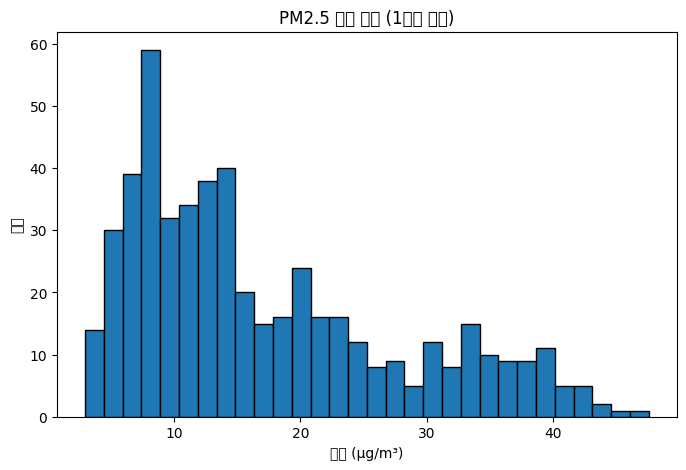

In [35]:
# PM 2.5 히스토그램
plt.figure(figsize=(8,5))
plt.hist(df_clean[pm25_col].dropna(), bins=30, edgecolor='black')
plt.title('PM2.5 질량 농도 (1시간 단위)')
plt.xlabel('농도 (µg/m³)')
plt.ylabel('빈도')
plt.show()

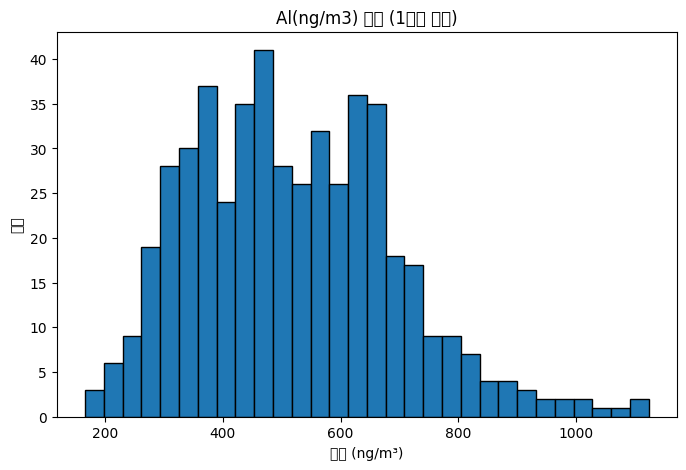

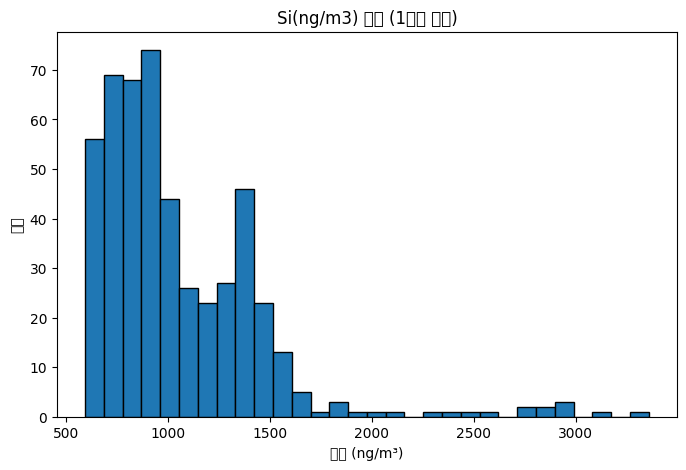

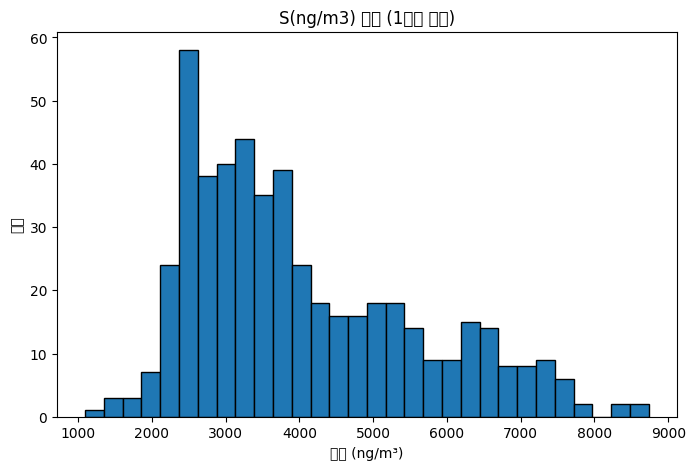

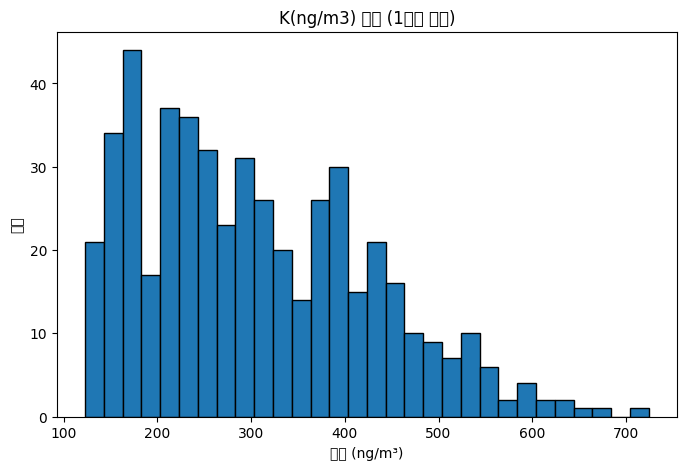

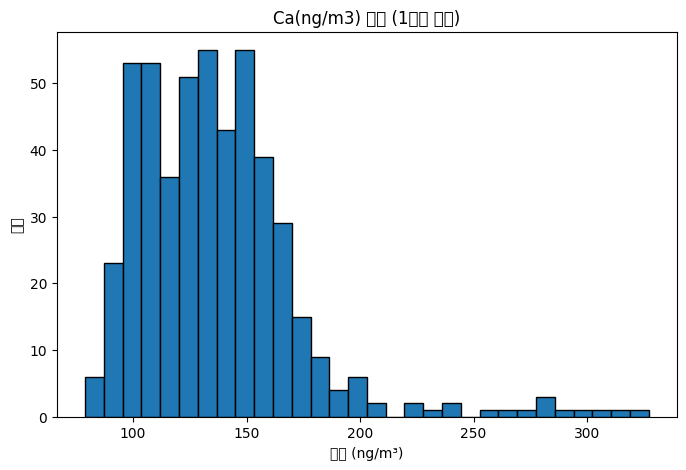

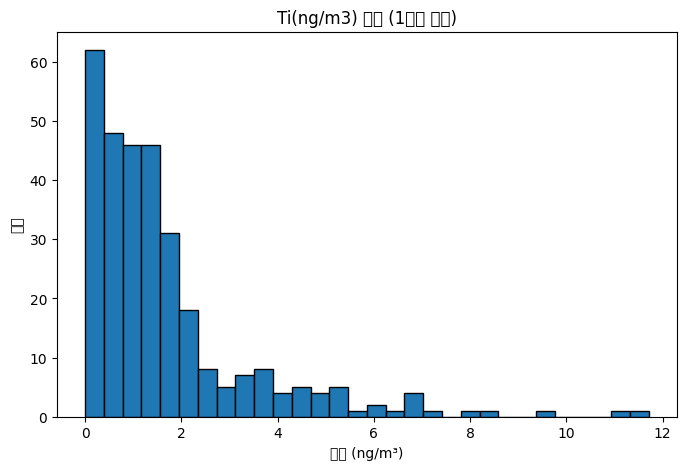

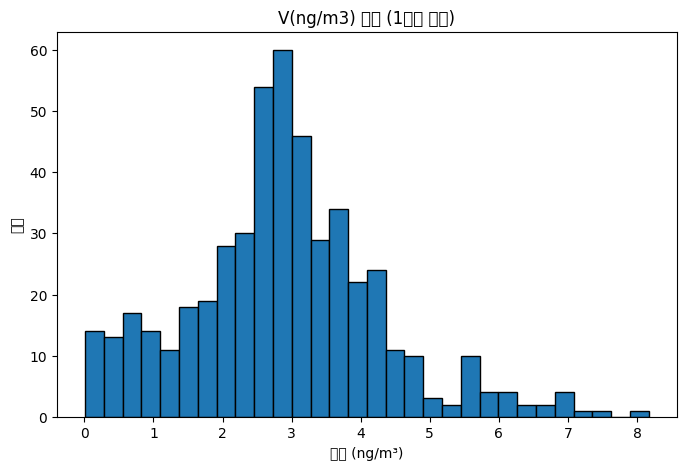

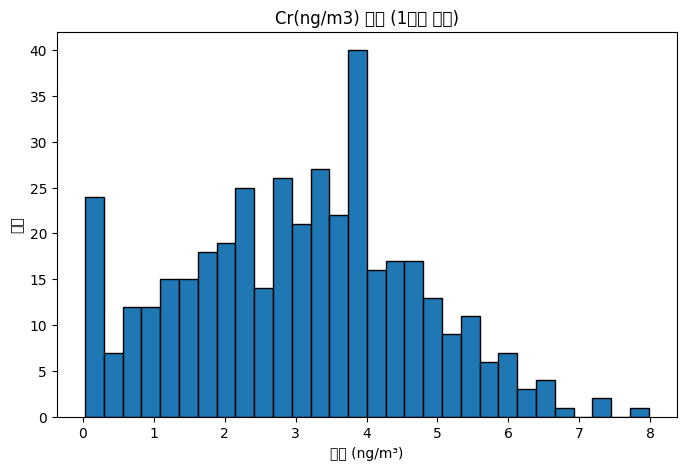

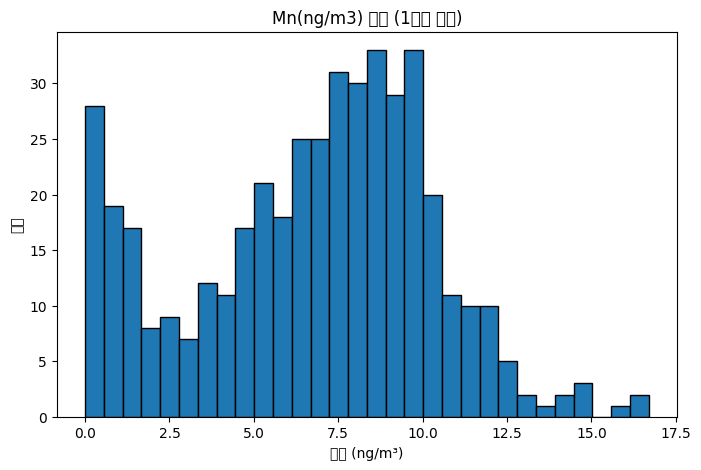

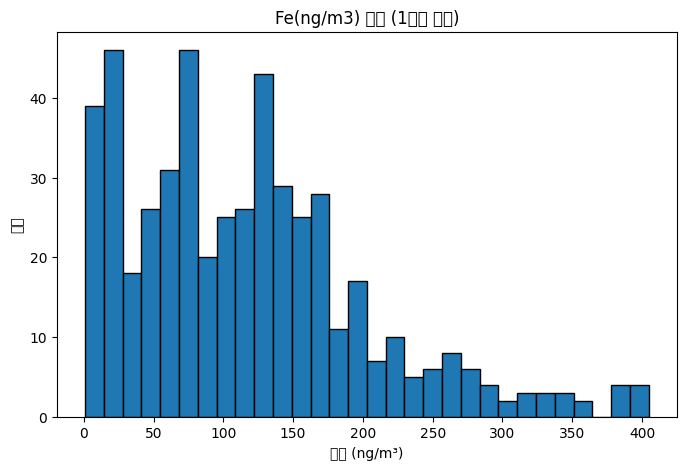

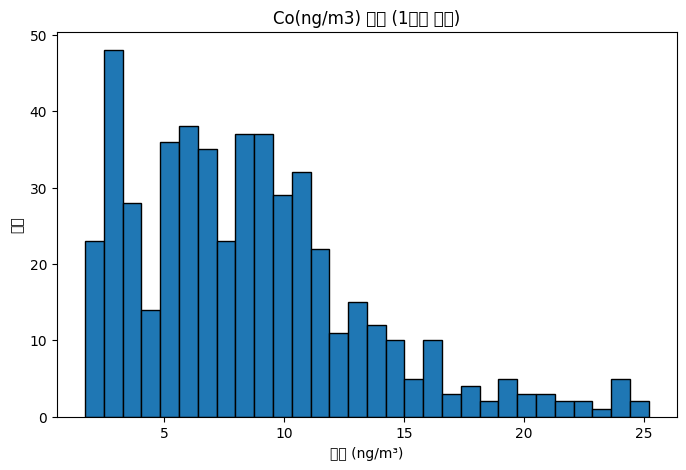

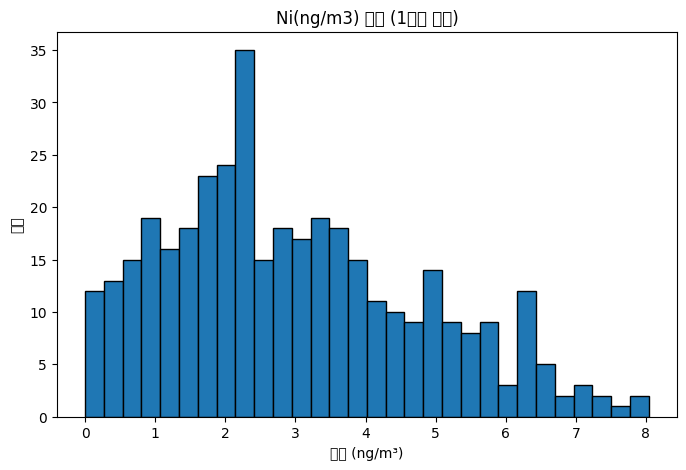

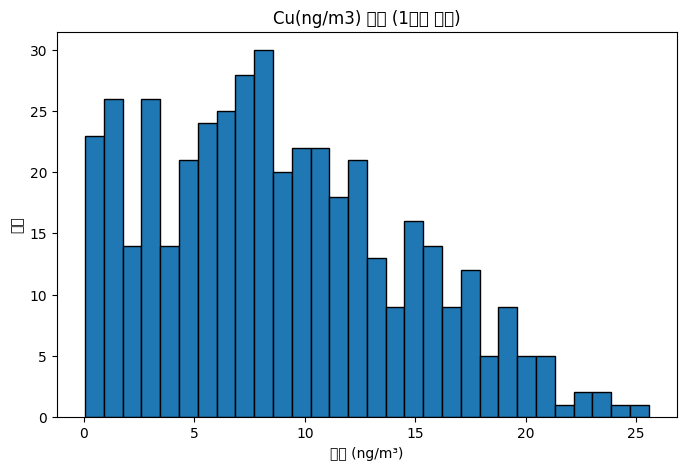

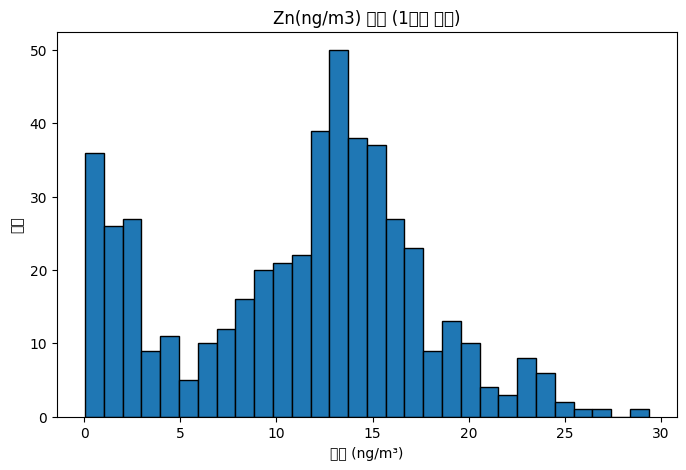

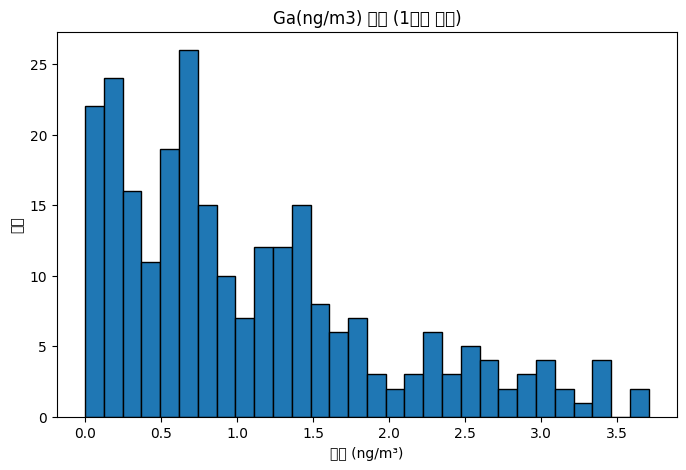

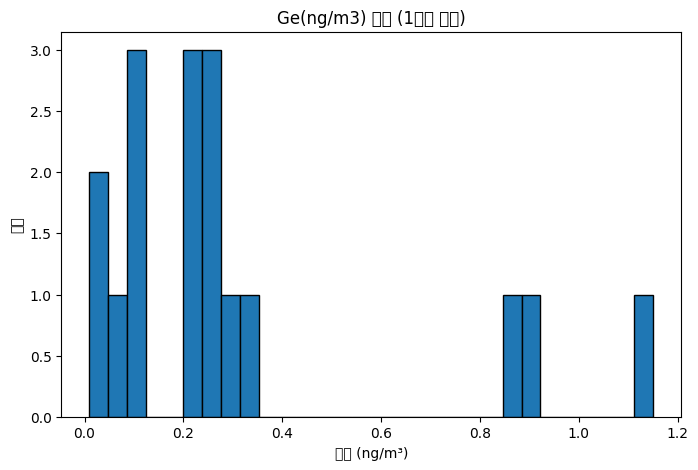

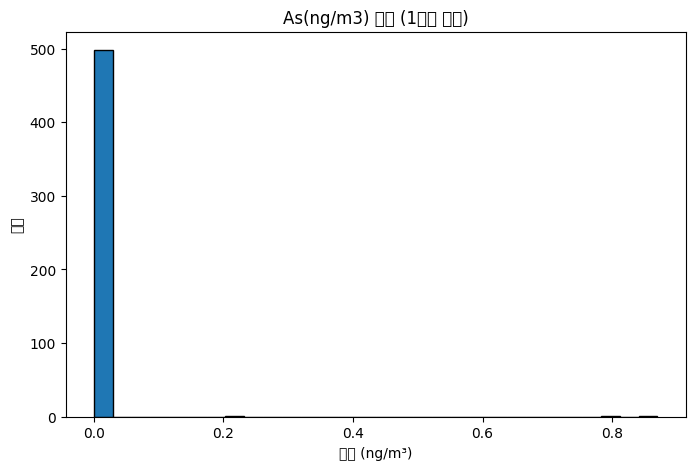

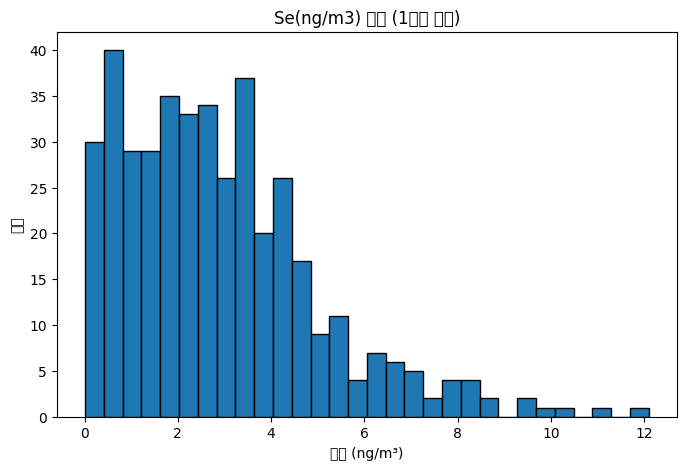

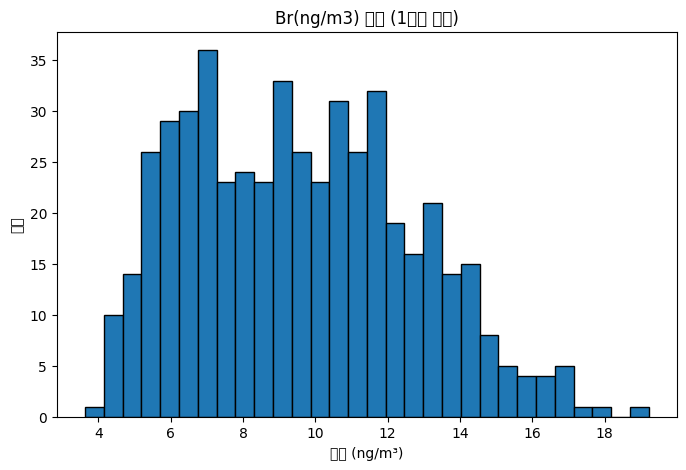

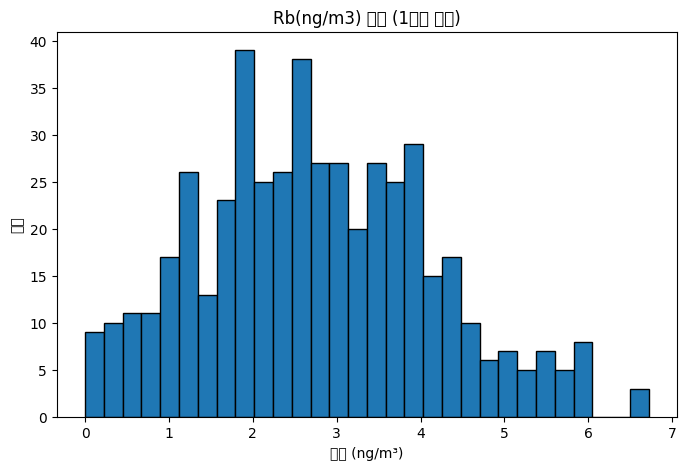

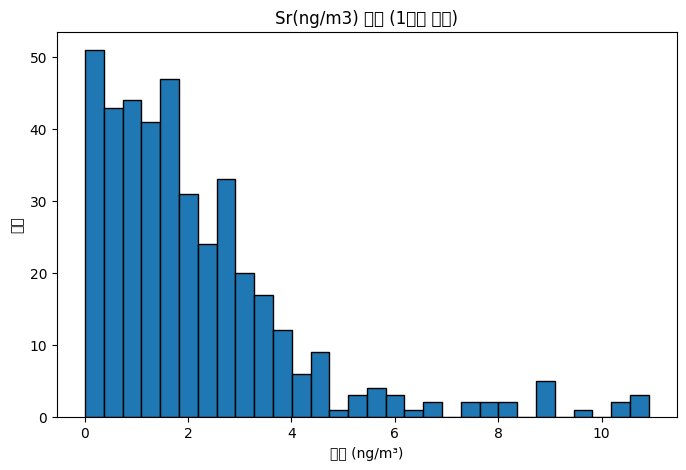

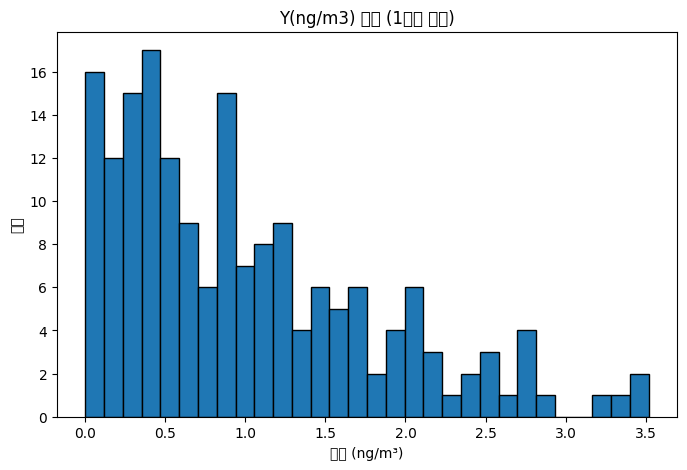

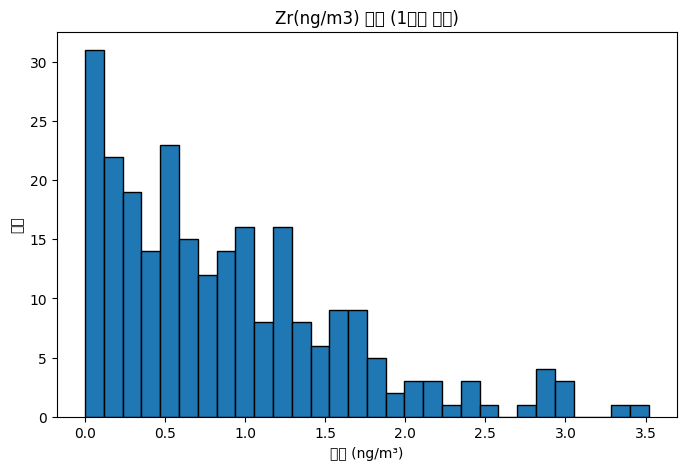

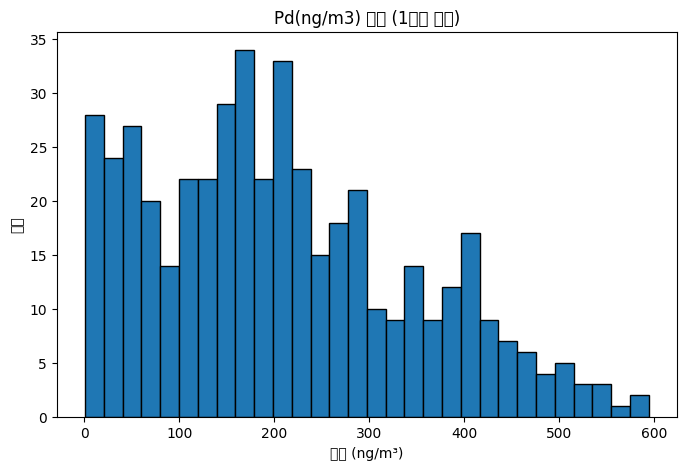

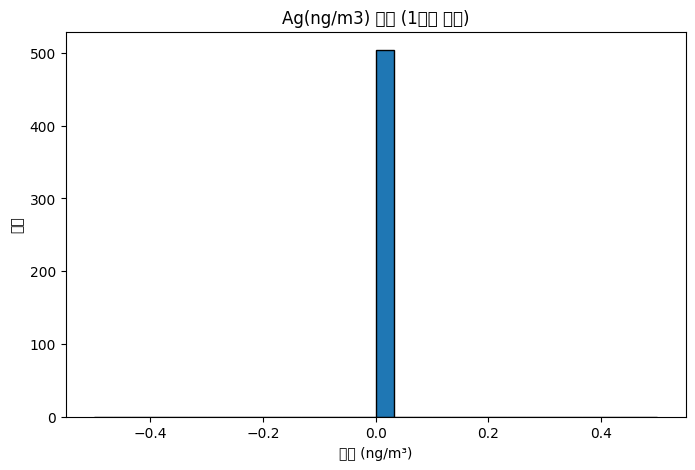

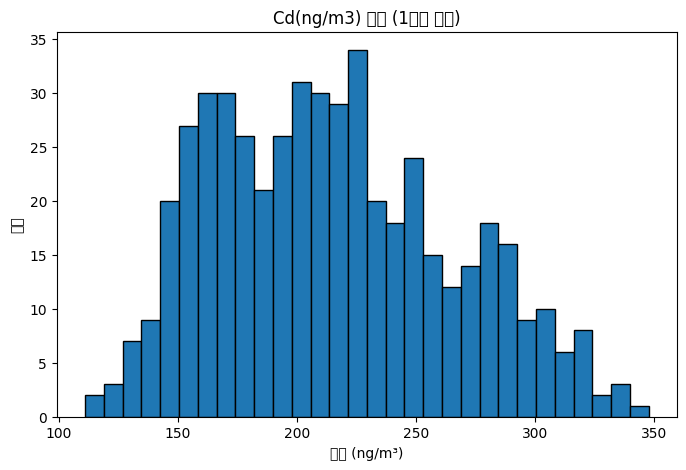

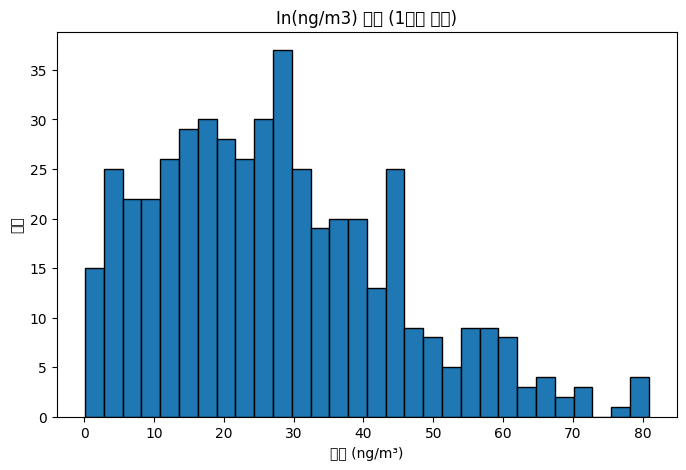

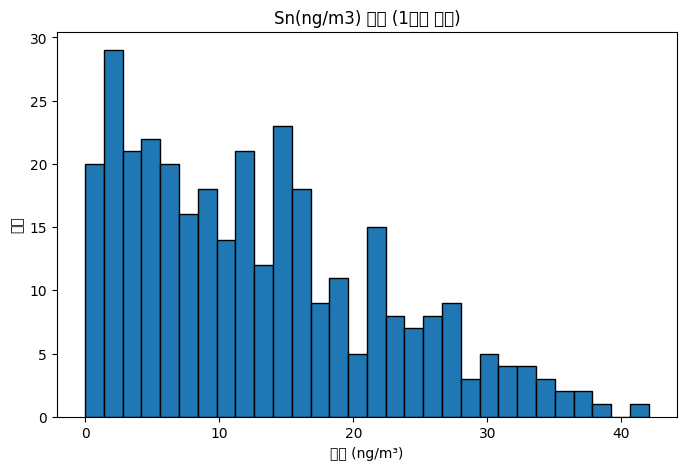

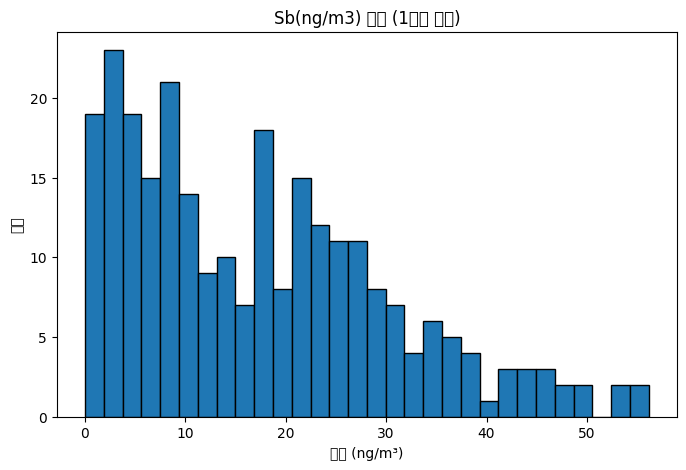

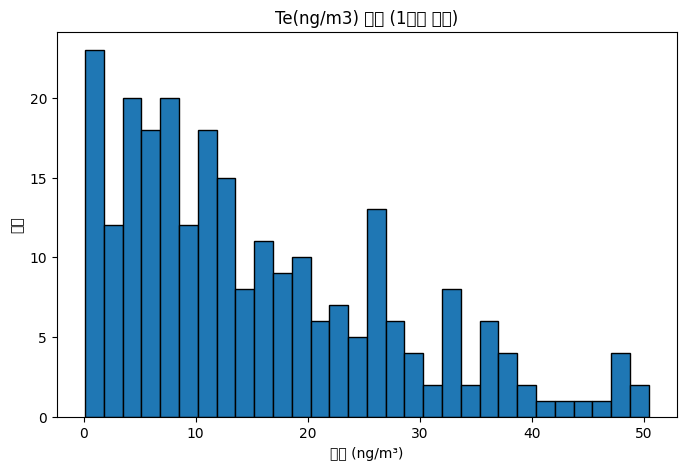

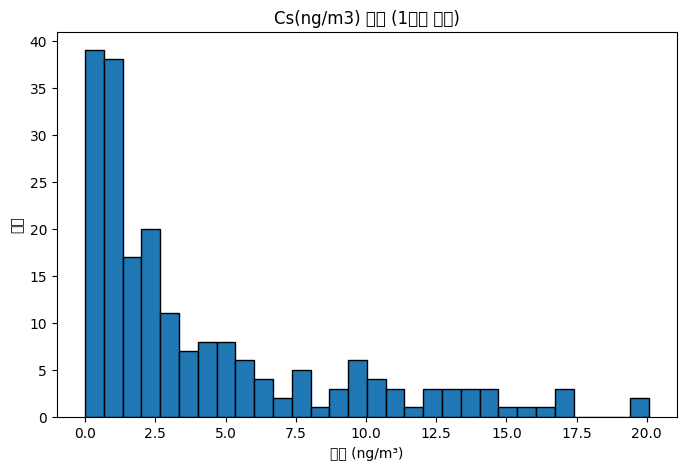

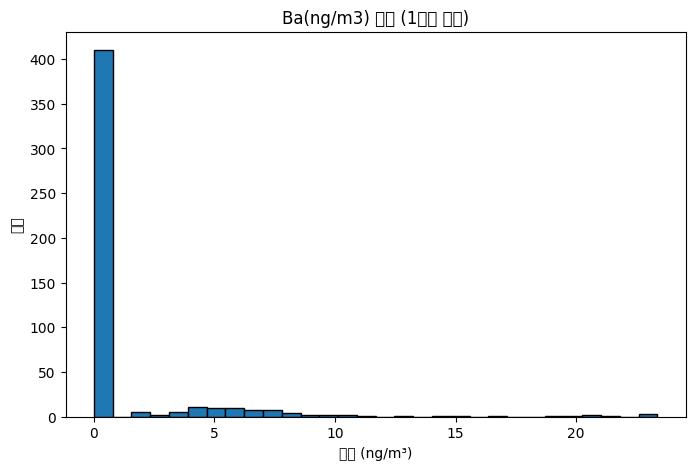

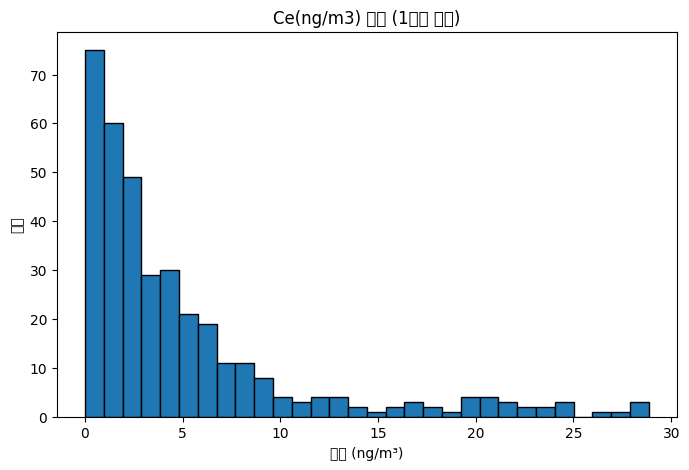

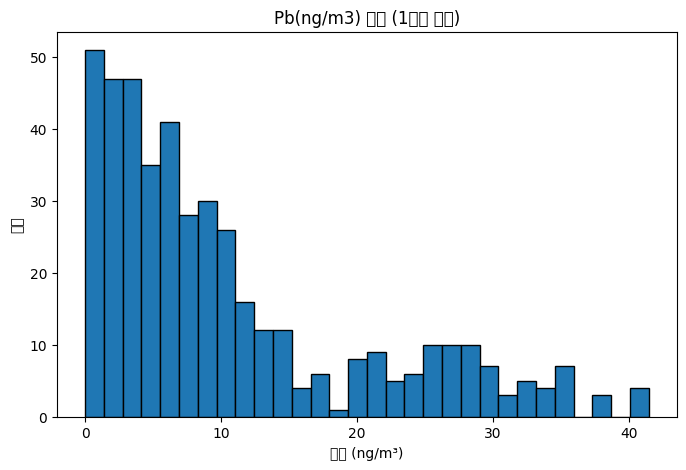

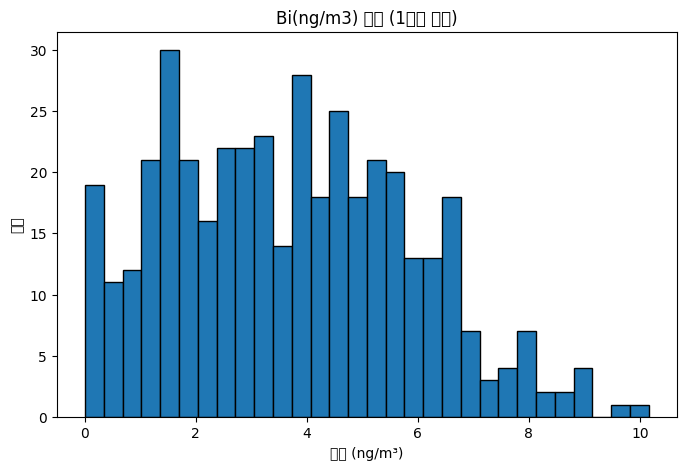

In [33]:
#금속별 히스토그램
for metal in metal_cols:
    plt.figure(figsize=(8,5))
    plt.hist(df_clean[metal].dropna(), bins=30, edgecolor='black')
    plt.title(f'{metal} 농도 (1시간 단위)')
    plt.xlabel('농도 (ng/m³)')
    plt.ylabel('빈도')
    plt.show()